In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let us start with some solid theory foundation before we build a neural network from scratch.

Deep Learning is the term for Artificial Neural Network with many layers. Where, each layer is responsible for learning some intricate pattern in data.

 ANN typically consists of the following layers:
	 Input layer,
	 Hidden layer, and
	 Output layer

Each layer is just a collection of neurons. All neurons in one layer interact with neurons in other layers. However, neurons in one layer donot interact with one another. We use the terms nodes or units to represent neurons in ANN.

We need to introduce non-linearity in neural networks in order to learn complex underlying patterns in data.

Non-linearity is introduced using activation functions. Some commonly used activation functions can be defined mathematically as follows:

**Sigmoid Function**

Scales the given value between 0 to 1.
Generates a S-Shaped Curve

For small values of x the sigmoid value is ≈0,
whereas for large values ≈1

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [28]:
x_data = np.linspace(-5, 5, 1000)
data_sigmoid = [sigmoid(x) for x in x_data]

Text(0, 0.5, 'Sigmoid(X)')

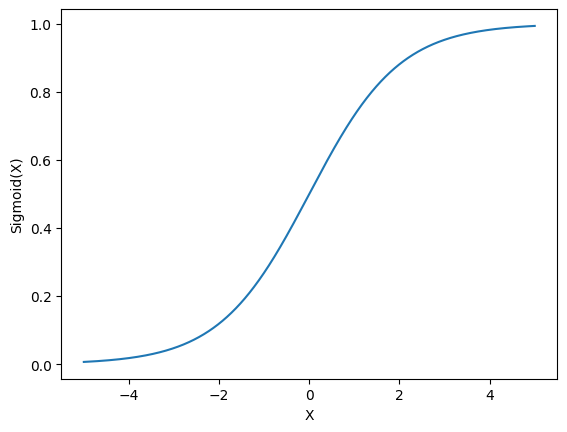

In [29]:
plt.plot(x_data, data_sigmoid)
plt.xlabel("X")
plt.ylabel("Sigmoid(X)")

**Tanh function**

In [30]:
def tanh(x):
    numerator = 1 - np.exp(-2 * x)
    denominator = 1 + np.exp(-2 * x)
    return numerator / denominator

In [31]:
x_data = np.linspace(-10, 10, 10000)

In [32]:
data_tanh = [tanh(x) for x in x_data]

Text(0, 0.5, 'Tanh(X)')

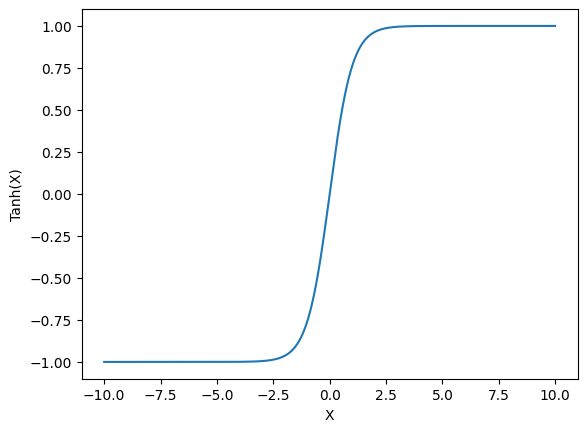

In [33]:
plt.plot(x_data, data_tanh)
plt.xlabel("X")
plt.ylabel("Tanh(X)")

**Rectified Linear Unit(ReLU) Function**

It is a step-wise function which return 0 when value of x is negative and when value of x>=0 it returns f(x)

In [34]:
def ReLU(x):
    if x < 0:
        return 0
    else:
        return x

In [35]:
x_data = np.linspace(-10, 10, 100)
data_ReLU = [ReLU(x) for x in x_data]

Text(0, 0.5, 'ReLU(X)')

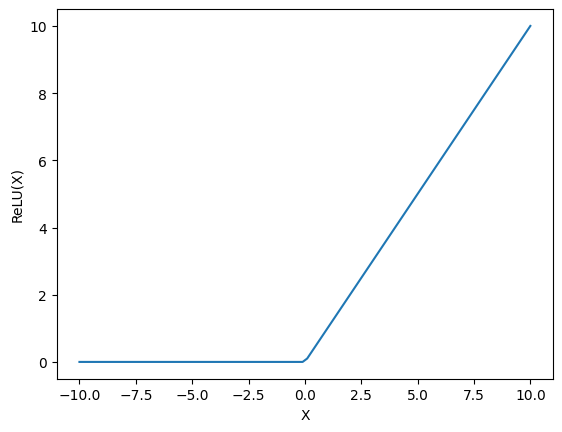

In [36]:
plt.plot(x_data, data_ReLU)
plt.xlabel("X")
plt.ylabel("ReLU(X)")

**Leaky ReLU**


It is the same as ReLU, but instead of assigning value 0, it uses some small slope(α) for negative values of x. The value for α is usually set to 0.01

In [37]:
# for generating a convincing graph for Leaky ReLU we will use a larger value of alpha
def leaky_ReLU(x, alpha=0.1):
    if x < 0:
        return alpha * x
    else:
        return x

In [38]:
x_data = np.linspace(-1000, 1000, 2000)
data_leaky_ReLU = [leaky_ReLU(x) for x in x_data]

Text(0, 0.5, 'Leaky ReLU(X)')

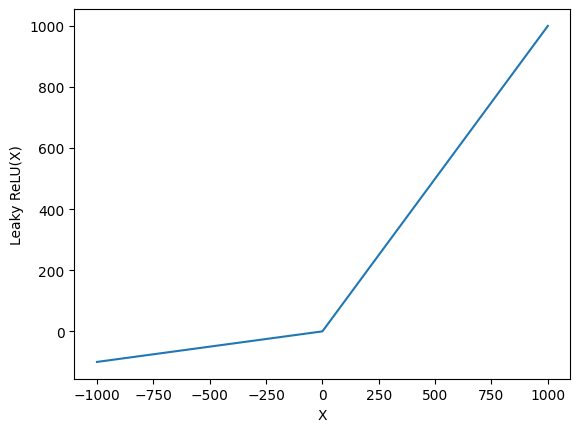

In [39]:
plt.plot(x_data, data_leaky_ReLU)
plt.xlabel("X")
plt.ylabel("Leaky ReLU(X)")

**ELU(Exponential Linear Unit)** Function


Similar to Leaky ReLU i.e has a small slope for -ve values.
However, insted of a straight line, it has a log curve

In [40]:
# for generating a convincing graph for ELU we will use a larger value of alpha
def ELU(x,alpha=1):
    if x < 0:
        return alpha * (np.exp(x) - 1)
    else:
        return x

In [41]:
x_data = np.linspace(-10, 10, 20)
data_ELU = [ELU(x) for x in x_data]

Text(0, 0.5, 'ELU(X)')

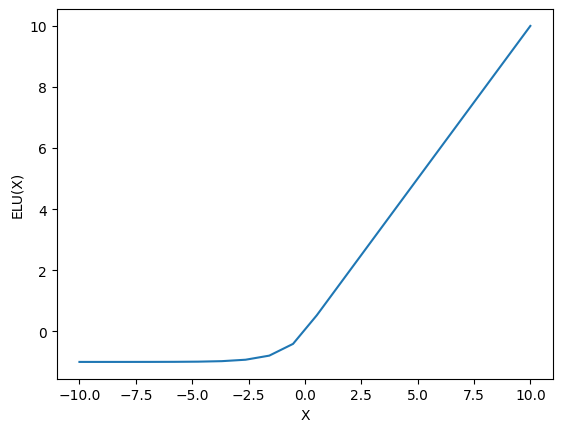

In [42]:
plt.plot(x_data, data_ELU)
plt.xlabel("X")
plt.ylabel("ELU(X)")

**Swish Function**

Different from other conventional activation functions, due to its non-monotonic nature. It is neither always increasing nor always decreasing.

In [43]:
def swish(x, beta):
    return 2 * x * sigmoid(beta * x)

In [44]:
x_data = np.linspace(-1000, 1000, 2000)
data_swish = [swish(x, 0.01) for x in x_data]

Text(0, 0.5, 'Swish(X)')

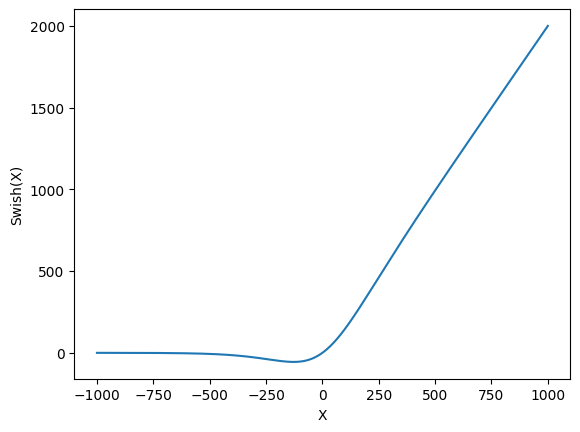

In [45]:
plt.plot(x_data, data_swish)
plt.xlabel("X")
plt.ylabel("Swish(X)")

**Softmax Function**

Generalization of the sigmoid function. Usually applied to the final layer of the network when performing multi-class classification.

In [46]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=0)

In [47]:
x_data = [[1, 2, 3], [2, 3, 4]]
data_softmax = [softmax(x) for x in x_data]

In [48]:
print(data_softmax)
print(np.sum(data_softmax[0]))
print(np.sum(data_softmax[1]))

[array([0.09003057, 0.24472847, 0.66524096]), array([0.09003057, 0.24472847, 0.66524096])]
1.0
1.0


Finally, we will now build a Neural Network from scratch and use the concepts defined previously.

How ANN Learns?


**Forward Propagation** in ANN: In the forward propagation, the network is just trying to predict the output. If the cost function is more, we can say that the network is not predicting the output correctly. Our goal would be to minimize the cost function value. As we cant change input and output the value we can control in forward propagation is weights and bias values. As we randomized the values previously, now we can try optimizing the weights matrix using Gradient Descent.

As a result of forward propagation, we are in the output layer. We will now **Backpropagate** the network from the output layer to the input layer and calculate the gradient of the cost function with respect to all the weights between the output and the input layer so that we can minimize the error. After calculating gradients, we update the weight.

We now implement a Neural Netwok defined for XOR operation.

In [49]:
# define XOR operation
x = np.array([ [0, 1], [1, 0], [1, 1],[0, 0] ])
y = np.array([ [1], [1], [0], [0]])

We are considering a Neural Network with two layers: one hidden and one output layer having 5 and 1 node respectively. We define the number of nodes in each layer.

In [50]:
num_input = 2
num_hidden = 5
num_output = 1

initialize weights and bias value

In [51]:
# Initialize input to hidden layer weights and bias
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))
# similarly for hidden layer to output layer weights and bias
Why = np.random.randn (num_hidden,num_output)
by = np.zeros((1,num_output))

In [52]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [53]:
def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)

    return z1,a1,z2,y_hat

In [54]:
def backward_prop(y_hat, z1, a1, z2):
  # delta is defined for the common term multiplied to ensure less computation to be done
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)

    return dJ_dWxh, dJ_dWhy

In [55]:
def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)

    return J

In [56]:
# Set the learning rate and number of training iterations:

alpha = 0.01
num_iterations = 5000

Now the training

In [57]:
cost = []
for i in range(num_iterations):

    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)

    #perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backward_prop(y_hat, z1, a1, z2)

    #update the weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy

    #compute cost
    c = cost_function(y, y_hat)

    #store the cost
    cost.append(c)

Text(0, 0.5, 'Cost')

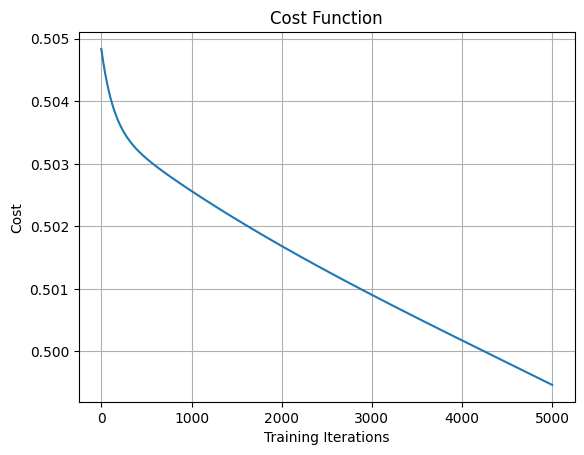

In [58]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')